Student Name: Vishnu Vardhan Reddy Sudireddy

#Title: PREDICT CAR PRICE USING NATURAL LANGUAGE PROCESSING AND MACHINE LEARNING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

import math
from sklearn.metrics import r2_score, mean_squared_error



In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Data Preprocessing

In [ ]:
# reading data
cars_data = pd.read_csv('/content/sample_data/data.csv')

In [ ]:
#visualizing data
cars_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
cars_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Data Cleaninig


In [ ]:
cars_data.columns = cars_data.columns.str.lower().str.replace(" ", "_")
cars_data.rename(columns = {'engine_fuel_type' : 'fuel_type',
                            'engine_hp' : 'hp',
                            'engine_cylinders' : 'cylinders',
                            'transmission_type' : 'transmission',
                            'driven_wheels' : 'drive',
                            'number_of_doors' : 'doors',
                            'market_category' : 'market',
                            'vehicle_size' : 'size',
                            'vehicle_style' : 'style',
                            'msrp' : 'price'},
                 inplace = True)

In [ ]:
# checking duplicates values
print('Number of duplicates are : ', cars_data.duplicated().sum())
cars_data = cars_data.drop_duplicates()

Number of duplicates are :  715


In [ ]:
# checking null values
print('Number of missing values in each columns are below : ')
print(cars_data.isnull().sum())

Number of missing values in each columns are below : 
make               0
model              0
year               0
fuel_type          3
hp                69
cylinders         30
transmission       0
drive              0
doors              6
market          3376
size               0
style              0
highway_mpg        0
city_mpg           0
popularity         0
price              0
dtype: int64


In [ ]:
#  droping market column as it has more null values
cars_data.drop('market', axis = 1, inplace = True)

<ipython-input-190-cffe36fe4c2e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
null_values = cars_data[cars_data.isnull().any(axis = 1)]
null_values

,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity,price
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35950
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199


In [ ]:
# filling the null values with appropriate posssible data
cars_data['fuel_type'] = cars_data['fuel_type'].fillna('regular unleaded')

cars_data['hp'] = cars_data['hp'].fillna(0)

cars_data['cylinders'] = cars_data['cylinders'].fillna(0)

cars_data['doors'] = cars_data['doors'].fillna(cars_data['doors'].mean())

<ipython-input-192-a1acb4ca6693>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-192-a1acb4ca6693>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-192-a1acb4ca6693>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-192-a1a

In [ ]:
num_col = cars_data.select_dtypes(include = [np.number])
cat_col = cars_data.select_dtypes(exclude = [np.number])

In [ ]:
# identifying the unique terms in each column
information = {
    'make': [],
    'model': [],
    'fuelType': [],
    'transmission': [],
    'drive': [],
    'size': [],
    'style': []
}

for col in cat_col:
    information[col] = cars_data[col].unique()

print(information)

{'make': array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object), 'model': array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
       '456M', '458 Italia', '4C', '4Runner', '

In [ ]:
# droping data with transmission "unknown"
cars_data.drop(cars_data[cars_data['transmission']=='UNKNOWN'].index, axis='index', inplace = True)

<ipython-input-195-6927d593c140>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Exploratory Data Analysis

### checking outliers

In [ ]:
for i in num_col:
    fig = px.box(cars_data, x = cars_data[i])
    fig.update_traces(fillcolor = '#C9A26B')
    fig.show()


### removing outliers

In [ ]:
s1 = cars_data.shape
clean = cars_data[['hp', 'cylinders', 'highway_mpg', 'city_mpg', 'price']]
for i in clean.columns:
    qt1 = cars_data[i].quantile(0.25)
    qt3 = cars_data[i].quantile(0.75)
    iqr =  qt3 - qt1
    lower = qt1-(1.5*iqr)
    upper = qt3+(1.5*iqr)
    min_in = cars_data[cars_data[i]<lower].index
    max_in = cars_data[cars_data[i]>upper].index
    cars_data.drop(min_in, inplace = True)
    cars_data.drop(max_in, inplace = True)
s2 = cars_data.shape
outliers = s1[0] - s2[0]
print("Deleted outliers are : ", outliers)

Deleted outliers are :  1403


In [ ]:
fig = px.box(cars_data, x = cars_data['hp'])
fig.update_traces(fillcolor = '#C9A26B')

In [ ]:
cars_data.describe()

,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity,price
count,9784.00000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000
mean,2010.31204,231.154334,5.424162,3.505110,26.304374,19.180192,1560.331664,29204.537612
std,7.46610,78.693348,1.395065,0.841754,5.745849,4.376362,1464.248520,15605.472026
min,1990.00000,0.000000,3.000000,2.000000,12.000000,10.000000,21.000000,2000.000000
25%,2006.00000,170.000000,4.000000,3.000000,22.000000,16.000000,549.000000,20498.000000
50%,2014.00000,220.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,29089.000000
75%,2016.00000,288.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,38850.000000
max,2017.00000,485.000000,8.000000,4.000000,42.000000,31.000000,5657.000000,70900.000000


### features vs count plots

In [ ]:
for i in cars_data:
    fig = px.histogram(cars_data, x= i, color_discrete_sequence = ['#C9A26B'])
    fig.show()

### Hourse Power analysis

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['make'].unique(), y = cars_data.groupby('make').mean()['hp'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car brands with highest Hp', xaxis_title = "Car Brand", yaxis_title = "Hp")
fig.show()

<ipython-input-201-5901a0cae653>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['model'].unique(), y = cars_data.groupby('model').mean()['hp'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car models with highest Hp', xaxis_title = "Car Model", yaxis_title = "Hp")
fig.show()

<ipython-input-202-bf5562f7f939>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['fuel_type'].unique(), y = cars_data.groupby('fuel_type').mean()['hp'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car fuel types with highest Hp', xaxis_title = "Car Fuel Type", yaxis_title = "Hp")
fig.show()

<ipython-input-203-1b1356c607a2>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['transmission'].unique(), y = cars_data.groupby('transmission').mean()['hp'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car transmissions according to Hp', xaxis_title = "Car Transmission", yaxis_title = "Hp")
fig.show()

<ipython-input-204-94c5942de534>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['drive'].unique(), y = cars_data.groupby('drive').mean()['hp'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car drive according to Hp', xaxis_title = "Car Drive", yaxis_title = "Hp")
fig.show()

<ipython-input-205-b0e296e8c355>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['size'].unique(), y = cars_data.groupby('size').mean()['hp'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car size according to Hp', xaxis_title = "Car Size", yaxis_title = "Hp")
fig.show()

<ipython-input-206-5bfbe045a4bb>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['style'].unique(), y = cars_data.groupby('style').mean()['hp'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car style according to Hp', xaxis_title = "Car Style", yaxis_title = "Hp")
fig.show()

<ipython-input-207-5c34a705216e>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### Car Mileage analysis

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['make'].unique(), y = cars_data.groupby('make').mean()['city_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car brands with highest city mpg', xaxis_title = "Car Brand", yaxis_title = "City Mpg")
fig.show()

<ipython-input-208-7e425488ee1c>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['model'].unique(), y = cars_data.groupby('model').mean()['city_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car models with highest city mpg', xaxis_title = "Car Model", yaxis_title = "City Mpg")
fig.show()


<ipython-input-209-734d2cb53ade>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['fuel_type'].unique(), y = cars_data.groupby('fuel_type').mean()['city_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car fuel types with highest city mpg', xaxis_title = "Car Fuel Type", yaxis_title = "City Mpg")
fig.show()

<ipython-input-210-b3fb6883639e>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['transmission'].unique(), y = cars_data.groupby('transmission').mean()['city_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car transmissions according to city mpg', xaxis_title = "Car Transmission", yaxis_title = "City Mpg")
fig.show()

<ipython-input-211-e58646595f33>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['drive'].unique(), y = cars_data.groupby('drive').mean()['city_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car drive according to city mpg', xaxis_title = "Car Drive", yaxis_title = "City Mpg")
fig.show()

<ipython-input-212-633d72d9d4c3>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['size'].unique(), y = cars_data.groupby('size').mean()['city_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car size according to city mpg', xaxis_title = "Car Size", yaxis_title = "City Mpg")
fig.show()

<ipython-input-213-092c7b6d802c>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['style'].unique(), y = cars_data.groupby('style').mean()['city_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car style according to city mpg', xaxis_title = "Car Style", yaxis_title = "City Mpg")
fig.show()

<ipython-input-214-036e5833519f>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['make'].unique(), y = cars_data.groupby('make').mean()['highway_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car brands with highest highway mpg', xaxis_title = "Car Brand", yaxis_title = "Highway Mpg")
fig.show()

<ipython-input-215-43050e42ab1a>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['model'].unique(), y = cars_data.groupby('model').mean()['highway_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car models with highest highway mpg', xaxis_title = "Car Model", yaxis_title = "Highway Mpg")
fig.show()

<ipython-input-216-9c5f9ddfa7c5>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['fuel_type'].unique(), y = cars_data.groupby('fuel_type').mean()['highway_mpg'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 car fuel types with highest highway mpg', xaxis_title = "Car Fuel Type", yaxis_title = "Highway Mpg")
fig.show()

<ipython-input-217-85a968442290>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['transmission'].unique(), y = cars_data.groupby('transmission').mean()['highway_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car transmissions according to highway mpg', xaxis_title = "Car Transmission", yaxis_title = "Highway Mpg")
fig.show()

<ipython-input-218-5dca77b7ee2e>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['drive'].unique(), y = cars_data.groupby('drive').mean()['highway_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car drive according to highway mpg', xaxis_title = "Car Drive", yaxis_title = "Highway Mpg")
fig.show()

<ipython-input-219-446ccb6f97c4>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['size'].unique(), y = cars_data.groupby('size').mean()['highway_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car size according to highway mpg', xaxis_title = "Car Size", yaxis_title = "Highway Mpg")
fig.show()

<ipython-input-220-92492680d911>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['style'].unique(), y = cars_data.groupby('style').mean()['highway_mpg'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car style according to highway mpg', xaxis_title = "Car Style", yaxis_title = "Highway Mpg")
fig.show()

<ipython-input-221-701f86193734>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### car popularity analysis

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['make'].unique(), y = cars_data.groupby('make').mean()['popularity'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 popular car brands', xaxis_title = "Car Brand", yaxis_title = "Popularity")
fig.show()

<ipython-input-222-6cbec24bd601>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['model'].unique(), y = cars_data.groupby('model').mean()['popularity'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 popular car models', xaxis_title = "Car Model", yaxis_title = "Popularity")
fig.show()

<ipython-input-223-db63d5bcdee1>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['fuel_type'].unique(), y = cars_data.groupby('fuel_type').mean()['popularity'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 popular car fuel types', xaxis_title = "Car Fuel Type", yaxis_title = "Popularity")
fig.show()

<ipython-input-224-57d1027c38eb>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['transmission'].unique(), y = cars_data.groupby('transmission').mean()['popularity'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Popularity in car transmissions', xaxis_title = "Car Transmission", yaxis_title = "Popularity")
fig.show()

<ipython-input-225-b56145d51a28>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['drive'].unique(), y = cars_data.groupby('drive').mean()['popularity'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Popularity in car drives', xaxis_title = "Car Drive", yaxis_title = "Popularity")
fig.show()

<ipython-input-226-6474118637ab>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['size'].unique(), y = cars_data.groupby('size').mean()['popularity'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Popularity in car sizes', xaxis_title = "Car Size", yaxis_title = "Popularity")
fig.show()

<ipython-input-227-0c9c848f845d>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['style'].unique(), y = cars_data.groupby('style').mean()['popularity'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Popularity in car styles', xaxis_title = "Car Style", yaxis_title = "Popularity")
fig.show()

<ipython-input-228-6b115db194cf>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### car price analysis

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['make'].unique(), y = cars_data.groupby('make').mean()['price'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 expensive car brands', xaxis_title = "Car Brand", yaxis_title = "Price")
fig.show()

<ipython-input-229-066ee39ad0b9>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['model'].unique(), y = cars_data.groupby('model').mean()['price'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 expensive car models', xaxis_title = "Car Model", yaxis_title = "Price")
fig.show()

<ipython-input-230-4293f30fb24b>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['fuel_type'].unique(), y = cars_data.groupby('fuel_type').mean()['price'].sort_values()[:5], marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Top 5 expensive car Fuel Types', xaxis_title = "Car Fuel Type", yaxis_title = "Price")
fig.show()

<ipython-input-231-57bb217ff9cd>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['transmission'].unique(), y = cars_data.groupby('transmission').mean()['price'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car transmissions according to price', xaxis_title = "Car Transmission", yaxis_title = "Price")
fig.show()

<ipython-input-232-f53d82610090>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['drive'].unique(), y = cars_data.groupby('drive').mean()['price'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car drive according to price', xaxis_title = "Car Drive", yaxis_title = "Price")
fig.show()

<ipython-input-233-d3225b9e56f3>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['size'].unique(), y = cars_data.groupby('size').mean()['price'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car size according to price', xaxis_title = "Car Size", yaxis_title = "Price")
fig.show()

<ipython-input-234-2c8587d676f1>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = cars_data['style'].unique(), y = cars_data.groupby('style').mean()['price'].sort_values(), marker_color = '#C9A26B'))
fig.update_layout(title_text = 'Car style according to price', xaxis_title = "Car Style", yaxis_title = "Price")
fig.show()

<ipython-input-235-5833830fd016>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### car price vs cylinders vs year analysis

In [ ]:
fig = px.scatter(cars_data, x = 'year', y = 'price', color = 'cylinders')
fig.show()

### car price vs cylinders vs HP analysis

In [ ]:
fig = px.scatter(cars_data, x = 'hp', y = 'price', color = 'cylinders')
fig.show()

### car price vs cylinders vs city mileage analysis

In [ ]:
fig = px.scatter(cars_data, x = 'city_mpg', y = 'price', color = 'cylinders')
fig.show()

### car price vs cylinders vs highway mileage analysis

In [ ]:
fig = px.scatter(cars_data, x = 'highway_mpg', y = 'price', color = 'cylinders')
fig.show()

##Model building

In [ ]:
cat_features = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
cars_data = pd.get_dummies(cars_data, columns = cat_features)

In [ ]:
X = cars_data.drop('price', axis = 1)
y = cars_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
rfr = RandomForestRegressor(n_estimators = 40)
rfr_algo = make_pipeline(rfr)

rfr_algo.fit(X_train, y_train)
rfr_pred = rfr_algo.predict(X_test)

print('R2 Score is : ', r2_score(y_test, rfr_pred))
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, rfr_pred)))


R2 Score is :  0.9536431963599306
Mean squared error is :  3339.190959820919


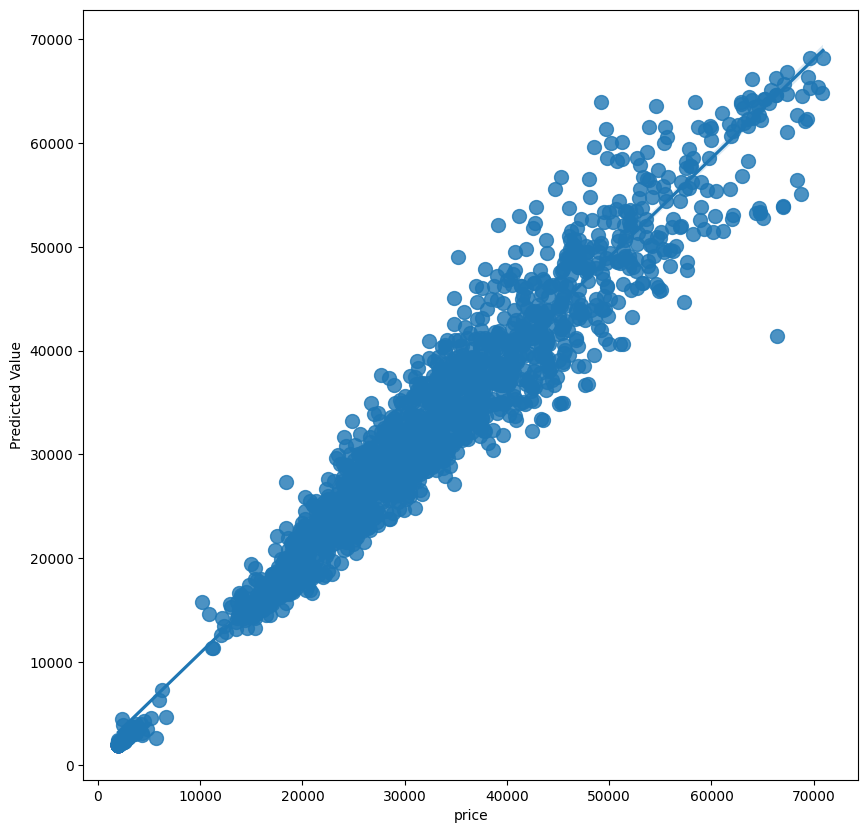

In [ ]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(x=y_test, y=rfr_pred, fit_reg=True, scatter_kws={"s": 100})
plt.show()

In [ ]:
import pandas as pd

def predict_car_price(user_input, rfr_algo, cat_features, sc, X):
    # Create a DataFrame from the user input
    user_input_df = pd.DataFrame([user_input])

    # One-hot encode categorical features
    user_input_df = pd.get_dummies(user_input_df, columns=cat_features)

    # Make sure the user input DataFrame has the same columns as the training data
    user_input_df = user_input_df.reindex(columns=X.columns, fill_value=0)

    # Standardize the input data using the same scaler
    user_input_scaled = sc.transform(user_input_df)

    # Use the trained model to make predictions
    predicted_price = rfr_algo.predict(user_input_scaled)

    return predicted_price[0]


## Speech Processing

In [ ]:
!pip install SpeechRecognition

In [ ]:
!pip install ffmpeg


In [ ]:
import speech_recognition as sr

audio_file_path = "/content/sample_data/negative_sell.wav"
recognizer = sr.Recognizer()

try:
    with sr.AudioFile(audio_file_path) as source:
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.record(source)
        audio_text = recognizer.recognize_google(audio)
        print("Transcription:", audio_text)
except sr.UnknownValueError:
    print("Could not understand audio")
except Exception as e:
    print(f"An error occurred: {e}")


Transcription: choose with my car due to various problems and I want to sell it can you predict the price of 2011 compact Coupe BMW 1 Series M model which takes premium unleaded as fuel it is a manual rear wheel drive car


In [ ]:
import nltk
# Download the nltk tokenizer model (if not already downloaded)
nltk.download('punkt')
# Input sentence
sentence = audio_text.lower()
# Tokenization using nltk
tokens = nltk.word_tokenize(sentence)
# Display the results
print("Original Sentence:", sentence)
print("Tokenized Sentence:", tokens)


Original Sentence: choose with my car due to various problems and i want to sell it can you predict the price of 2011 compact coupe bmw 1 series m model which takes premium unleaded as fuel it is a manual rear wheel drive car
Tokenized Sentence: ['choose', 'with', 'my', 'car', 'due', 'to', 'various', 'problems', 'and', 'i', 'want', 'to', 'sell', 'it', 'can', 'you', 'predict', 'the', 'price', 'of', '2011', 'compact', 'coupe', 'bmw', '1', 'series', 'm', 'model', 'which', 'takes', 'premium', 'unleaded', 'as', 'fuel', 'it', 'is', 'a', 'manual', 'rear', 'wheel', 'drive', 'car']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
target_vehicle = {
    'make': '',
    'model': '',
    'fuel_type': '',
    'transmission':'',
    'drive': '',
    'size': '',
    'style': ''
}
for item in information['make']:
  if item.lower() in sentence:
    target_vehicle['make'] = item
    break

for item in information['model']:
  if item.lower() in sentence:
    target_vehicle['model'] = item
    break

for item in information['fuelType']:
  if item.lower() in sentence:
    target_vehicle['fuel_type'] = item
    break

for item in information['transmission']:
  if item.lower() in sentence:
    target_vehicle['transmission'] = item
    break

for item in information['drive']:
  if item.lower() in sentence:
    target_vehicle['drive'] = item
    break


for item in information['size']:
  if item.lower() in sentence:
    target_vehicle['size'] = item
    break

for item in information['style']:
  if item.lower() in sentence:
    target_vehicle['style'] = item
    break


print(target_vehicle)

{'make': 'BMW', 'model': '1 Series M', 'fuel_type': '', 'transmission': 'MANUAL', 'drive': 'rear wheel drive', 'size': 'Compact', 'style': 'Coupe'}


In [ ]:
predicted_price = predict_car_price(target_vehicle, rfr_algo, cat_features, sc, X)

In [ ]:
!pip install gtts

In [ ]:
from gtts import gTTS
import os

def text_to_speech(text, language='en', filename='output.mp3'):
    tts = gTTS(text=text, lang=language, slow=False)
    tts.save(filename)
    os.system(f"start {filename}")  # This command opens the file with the default audio player

# Example usage:
text = f'the predicted cost of the car is ${predicted_price}'
text_to_speech(text)


### Sentiment analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')  # Download the VADER lexicon

def analyze_sentiment(sentence):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(sentence)

    if sentiment_scores['compound'] >= 0.05:
        return "Positive"
    elif sentiment_scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Example usage:
sentiment = analyze_sentiment(sentence)
print(sentence)

print(f"Sentiment: {sentiment}")


choose with my car due to various problems and i want to sell it can you predict the price of 2011 compact coupe bmw 1 series m model which takes premium unleaded as fuel it is a manual rear wheel drive car
Sentiment: Negative


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
